In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')

df=pd.read_csv("bike_sharing.csv",parse_dates=["datetime"])
df.head()

## Description



 * datetime: datetime
 * season: season (1: spring, 2: summer, 3: fall, 4: winter)
 * holiday: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
 * workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
 * weather:
   * : Clear, Few clouds, partly cloudy, partly cloudy
   * : Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
   * : Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
   * : Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

 * temp: temperature in Celsius
 * atemp: feeling temperature in Celsius
 * humidity: humidity
 * windspeed: wind speed
 * casual: count of casual users
 * registered: count of registered users
 * count: count of total rental bikes including both casual and registered

























## Basic Information about dataset

In [33]:
def basic_information(data):
  print("The shape of the dataset is",data.shape)
  print("--"*50)
  print("The number of duplicate rows is :",data.duplicated().sum())
  print("--"*50)
  print("Are there any null values:",np.any(data.isnull()))
  print("--"*50)
  print("The number of mull values in each columns :",data.isnull().sum())
  print("--"*50)
  print("The number of unique values in each columns :",data.nunique())



In [34]:
basic_information(df)

The shape of the dataset is (10886, 12)
----------------------------------------------------------------------------------------------------
The number of duplicate rows is : 0
----------------------------------------------------------------------------------------------------
Are there any null values: False
----------------------------------------------------------------------------------------------------
The number of mull values in each columns : datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64
----------------------------------------------------------------------------------------------------
The number of unique values in each columns : datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual      

In [ ]:
df.info()
# There are three float type fields (temp,atemp and windspeed) ,1 Object type(datetime) and rest all are int type
# we can see that there are some columns which need to be converted into categorical columns

Converting the required  Categorical column from "int" to "str"

In [ ]:
df_1=df.copy()
df_1.info()

In [39]:
df_1.head()
df_1["season"]=df_1["season"].replace(1,"spring")

# Replacing one value

In [ ]:
replace_dict={1: "spring", 2: "summer", 3: "fall", 4: "winter"}
df_1["season"]=df_1["season"].replace(replace_dict)
df_1
# Replacing multiple value

In [41]:
replc_dic={1:"Holiday",0:"Not a holiday"}
df_1["holiday"]=df_1["holiday"].replace(replc_dic)

In [42]:
replc_dic1={0:"Holiday or Weekend",1:"Work_Day"}
df_1["workingday"]=df_1["workingday"].replace(replc_dic1)

In [43]:
replace_dict2={1: "Clear",2: "Mist + Cloudy",3: "Light Snow+ Rain ",4:"Heavy Rain & Thunderstorm"}
df_1["weather"]=df_1["weather"].replace(replace_dict2)

In [ ]:
# during This replace it got converted to str type automatically
# If not we would have used
# df_1["season","holiday","workingday","weather"]=df_1["season","holiday","workingday","weather"].astype(str)

# categorical=["season","holiday","workingday","weather"]
# for i in categorical:
#   df[i]=df[i].astype("category")

df_1.tail(5)


In [ ]:
df_1.info()  # Checking the datatype of all the columns

Descriptive Analysis of Numerical columns

In [48]:
df_1.describe()

,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


Descriptive Analysis of Categorical column

In [50]:
df_1.describe(include="O")

,season,holiday,workingday,weather
count,10886,10886,10886,10886
unique,4,2,2,4
top,winter,Not a holiday,Work_Day,Clear
freq,2734,10575,7412,7192


In [52]:
df_2=df_1.copy()  # Taking the deep copy of the final dataset inorder to keep it intact

## Univariate Analysis

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
df_2.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,spring,Not a holiday,Holiday or Weekend,Clear,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,spring,Not a holiday,Holiday or Weekend,Clear,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,spring,Not a holiday,Holiday or Weekend,Clear,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,spring,Not a holiday,Holiday or Weekend,Clear,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,spring,Not a holiday,Holiday or Weekend,Clear,9.84,14.395,75,0.0,0,1,1


Univariate Analysis of Categorical columns

Descriptive Analysis

In [55]:
def static_info(df,column_list):
  for i in column_list:
    print(f"\t\tfor feature {i}")
    print(df[i].value_counts(normalize=True)*100)
    print("--"*50)
    print()

In [56]:
L=["workingday","weather","season","holiday"]
static_info(df_2,L)

		for feature workingday
Work_Day              68.087452
Holiday or Weekend    31.912548
Name: workingday, dtype: float64
----------------------------------------------------------------------------------------------------

		for feature weather
Clear                        66.066507
Mist + Cloudy                26.033437
Light Snow+ Rain              7.890869
Heavy Rain & Thunderstorm     0.009186
Name: weather, dtype: float64
----------------------------------------------------------------------------------------------------

		for feature season
winter    25.114826
summer    25.105640
fall      25.105640
spring    24.673893
Name: season, dtype: float64
----------------------------------------------------------------------------------------------------

		for feature holiday
Not a holiday    97.14312
Holiday           2.85688
Name: holiday, dtype: float64
----------------------------------------------------------------------------------------------------



Visual Analysis

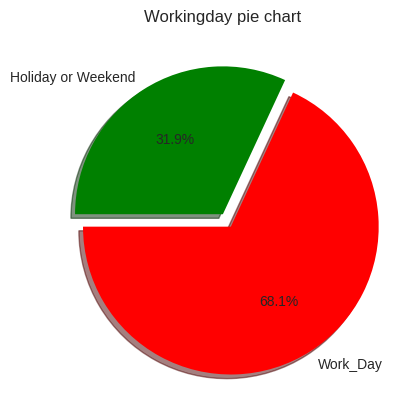

In [57]:
lab=df_2["workingday"].value_counts().index
plt.title("Workingday pie chart")
plt.pie(df_2["workingday"].value_counts(),
        labels=lab,autopct='%1.1f%%',
        shadow=True,
        startangle=180,
        explode=(0.1,0),
        colors=["r",'g'])
plt.show()


Insight :
 Approximately 70 % of the days are working days and 30 % are holidas or weekend
 so discounts on rents should be accordingly to have a balanced buisness approach

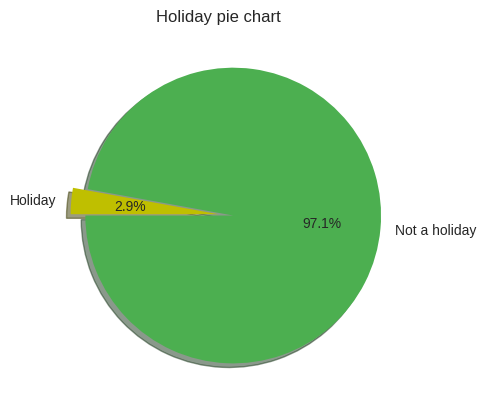

In [ ]:
lab=df_2["holiday"].value_counts().index
plt.title("Holiday pie chart")
plt.pie(df_2["holiday"].value_counts(),
        labels=lab,autopct='%1.1f%%',
        shadow=True,
        startangle=180,
        explode=(0.1,0),
        colors=["#4CAF50",'y'])
plt.show()

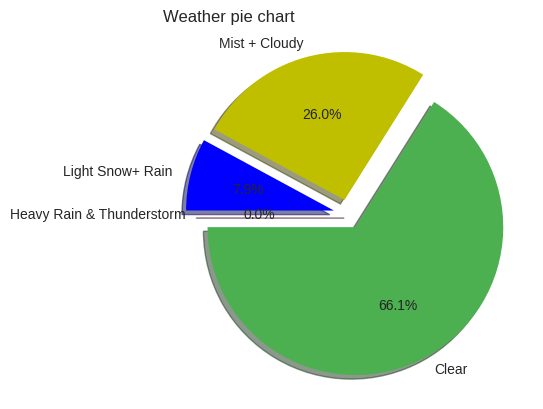

In [ ]:
lab=df_2["weather"].value_counts().index
plt.title("Weather pie chart",loc="left")
plt.pie(df_2["weather"].value_counts(),
        labels=lab,autopct='%1.1f%%',
        shadow=True,
        startangle=180,
        explode=(0.1,0.1,0.1,0),
        colors=["#4CAF50",'y',"b","hotpink"])
plt.show()

Insight: Targetting the clear weather days for more rentals will be benefecial for the buisness, not neglecting the light rain and misty days

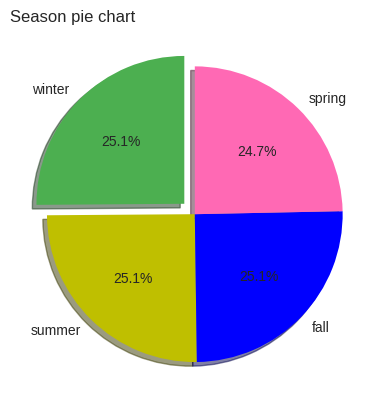

In [ ]:
lab=df_2["season"].value_counts().index
plt.title("Season pie chart",loc="left")
plt.pie(df_2["season"].value_counts(),
        labels=lab,autopct='%1.1f%%',
        shadow=True,
        startangle=90,
        explode=(0.1,0,0,0),
        colors=["#4CAF50",'y',"b","hotpink"])
plt.show()

Insight: There is almost equal division in terms of the season ,which gives company equal opportunity in all the seasons to plan and execute the total rental

Univariate Analysis of Numerical Analysis

In [ ]:
df_2.head()

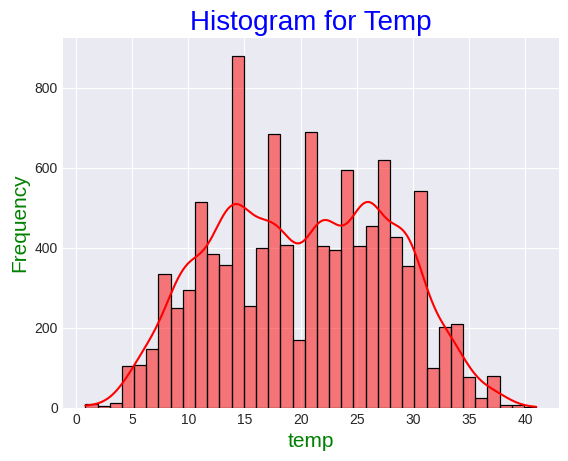

In [ ]:
font1={"color":"green","size":15}
font2={"color":"blue","size":20}
plt.title("Histogram for Temp",fontdict=font2)
sns.histplot(data=df_2,x="temp",kde=True,color="r")
plt.xlabel("temp",fontdict=font1)
plt.ylabel("Frequency",fontdict=font1)
plt.show()

Insight: The maximum number of days temperature is between 15 and 30 degree celsius and it follows the Normal Distribution approximately

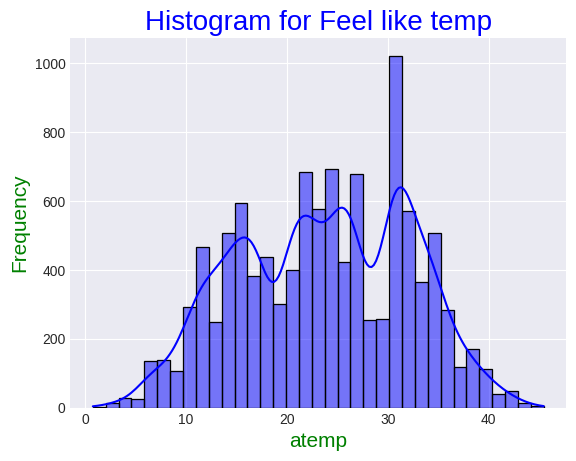

In [ ]:
font1={"color":"green","size":15}
font2={"color":"blue","size":20}
plt.title("Histogram for Feel like temp",fontdict=font2)
sns.histplot(data=df_2,x="atemp",kde=True,color="Blue")
plt.xlabel("atemp",fontdict=font1)
plt.ylabel("Frequency",fontdict=font1)
plt.show()

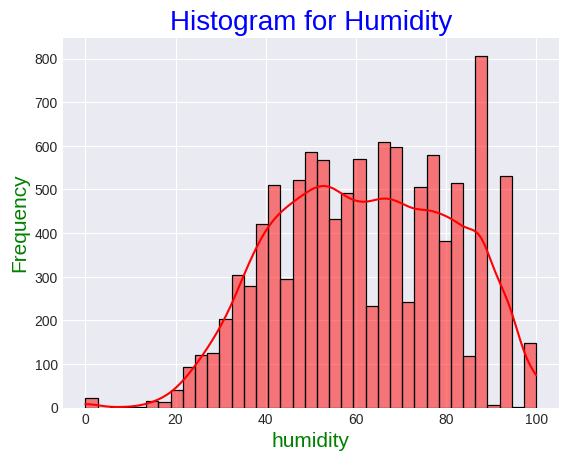

In [ ]:
font1={"color":"green","size":15}
font2={"color":"blue","size":20}
plt.title("Histogram for Humidity",fontdict=font2)
sns.histplot(data=df_2,x="humidity",kde=True,color="r")
plt.xlabel("humidity",fontdict=font1)
plt.ylabel("Frequency",fontdict=font1)
plt.show()

Insight: Maximum no of days humidity is between 40 and 85 and this follows a approximate Normal distribution

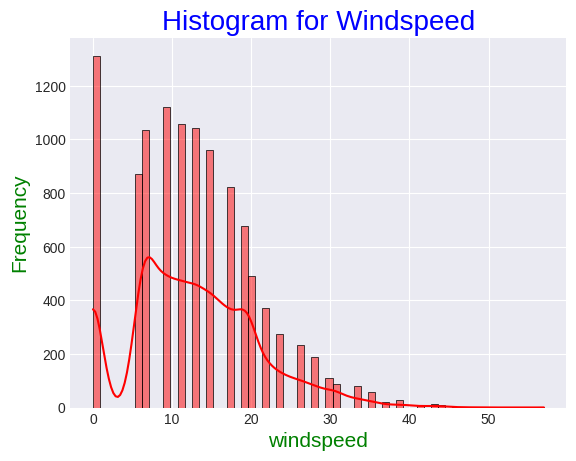

In [ ]:
font1={"color":"green","size":15}
font2={"color":"blue","size":20}
plt.title("Histogram for Windspeed",fontdict=font2)
sns.histplot(data=df_2,x="windspeed",kde=True,color="r")
plt.xlabel("windspeed",fontdict=font1)
plt.ylabel("Frequency",fontdict=font1)
plt.show()

Insight: windspeed data shows that it is right skewed and it approximately follows Lognormal Distribution and it contains outliers as well

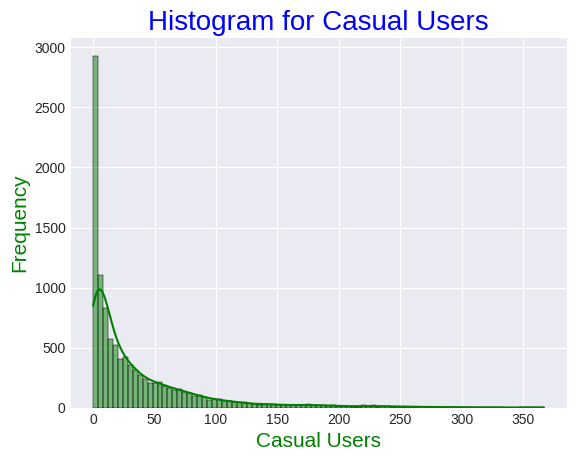

In [ ]:
font1={"color":"green","size":15}
font2={"color":"blue","size":20}
plt.title("Histogram for Casual Users",fontdict=font2)
sns.histplot(data=df_2,x="casual",kde=True,color="green")
plt.xlabel("Casual Users",fontdict=font1)
plt.ylabel("Frequency",fontdict=font1)
plt.show()

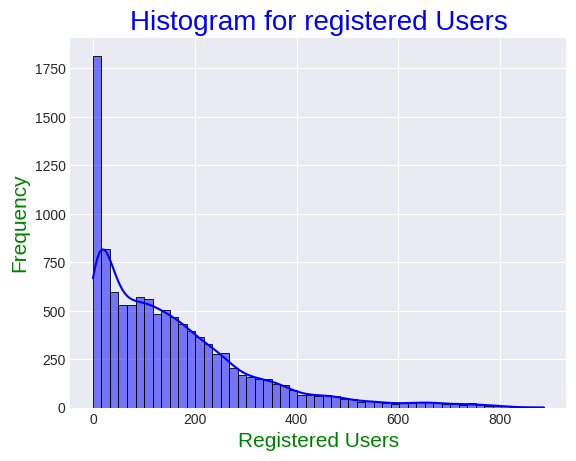

In [ ]:
font1={"color":"green","size":15}
font2={"color":"blue","size":20}
plt.title("Histogram for registered Users",fontdict=font2)
sns.histplot(data=df_2,x="registered",kde=True,color="b")
plt.xlabel("Registered Users",fontdict=font1)
plt.ylabel("Frequency",fontdict=font1)
plt.show()

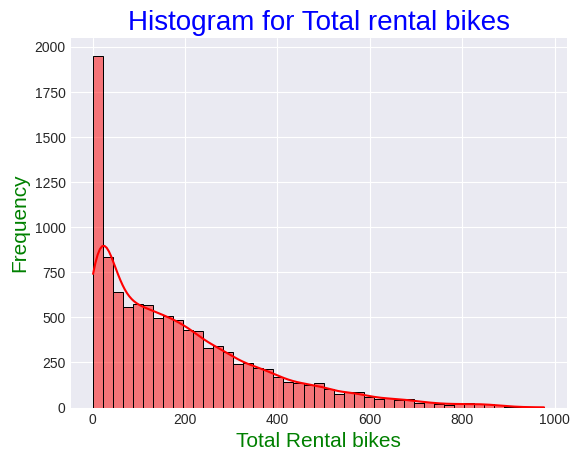

In [ ]:
font1={"color":"green","size":15}
font2={"color":"blue","size":20}
plt.title("Histogram for Total rental bikes",fontdict=font2)
sns.histplot(data=df_2,x="count",kde=True,color="r")
plt.xlabel("Total Rental bikes",fontdict=font1)
plt.ylabel("Frequency",fontdict=font1)
plt.show()

Insight: casual,registred and total count data shows that it is right skewed and it approximately follows Lognormal Distribution and it contains outliers as well and maximum of days have low number of bikes rented

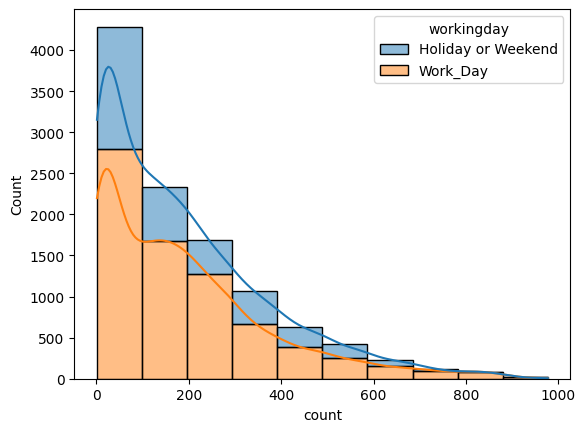

In [ ]:
sns.histplot(data=df_2,x="count",hue="workingday",kde=True,binwidth=100,color="orange",multiple="stack")
# either give binwidth or bins argument (i.e. binwidth=20 or bins=20)
plt.show()

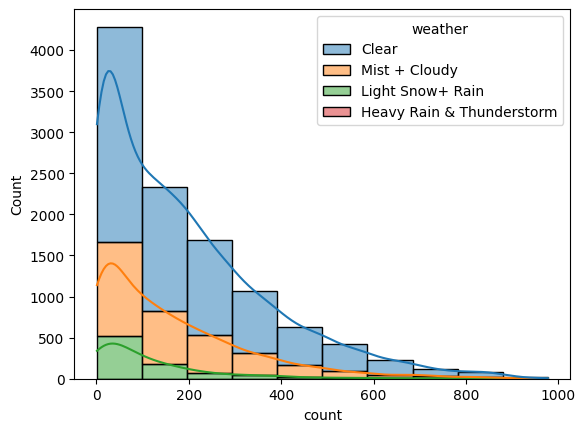

In [ ]:
sns.histplot(data=df_2,x="count",hue="weather",kde=True,binwidth=100,color="r",multiple="stack")
# either give binwidth or bins argument (i.e. binwidth=20 or bins=20)
plt.show()

# Bivariate Analysis

## Descriptive Analysis

In [ ]:

def stat_info(df,list):
  for i in list:
    print(f"\t\tfor feature {i} sum of total rental bikes is")
    print(df.groupby([i])["count"].sum())
    print("--"*50)
    print()

L=["workingday","season","weather"]
stat_info(df_2,L)

		for feature workingday sum of total rental bikes is
workingday
Holiday or Weekend     654872
Work_Day              1430604
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------

		for feature season sum of total rental bikes is
season
fall      640662
spring    312498
summer    588282
winter    544034
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------

		for feature weather sum of total rental bikes is
weather
Clear                        1476063
Heavy Rain & Thunderstorm        164
Light Snow+ Rain              102089
Mist + Cloudy                 507160
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------



# Visual Analysis

## Time Series Analysis

1. Monthly rental analysis

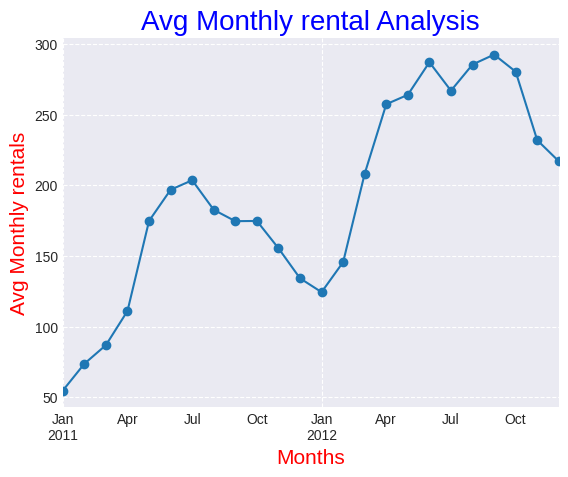

In [ ]:
df_1["date"]=df_1["datetime"].dt.date  # Extracting the date from the datetime as a sepearate column
df_1["date"]=pd.to_datetime(df_1["date"]) # Converting the date column to datetime format

df_1["date"].max()-df_1["date"].min()  # Checking the duration of data in terms of number of days
# The given data is for 718 days


x=df_1.loc[:,["date","count"]]  # Extracting date and count column from the dataset
x.set_index(["date"],inplace=True)  # setting the date as index
font1={"color":"red","size":15}
font2={"color":"blue","size":20}
plt.title("Avg Monthly rental Analysis",fontdict=font2)
x["count"].resample("M").mean().plot(kind = 'line', marker = 'o')    # Taking the monthwise data (here count) and taking the average for every month
plt.xlabel("Months",fontdict = font1)
plt.ylabel("Avg Monthly rentals",fontdict = font1)
plt.grid(linestyle="--")
plt.show()


Insight: There is more rental between April and july so more strategic planning
for other months is needed

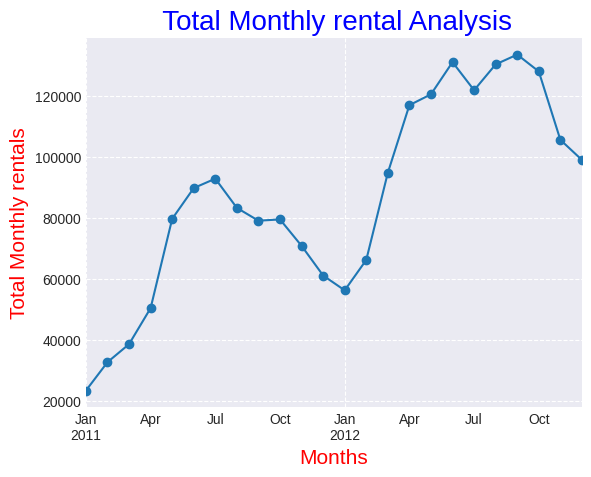

In [ ]:
font1={"color":"red","size":15}
font2={"color":"blue","size":20}
plt.title(" Total Monthly rental Analysis",fontdict=font2)
x["count"].resample("M").sum().plot(kind = 'line', marker = 'o')        # This is major step where it takes data for every month
plt.xlabel("Months",fontdict = font1)
plt.ylabel("Total Monthly rentals",fontdict = font1)
plt.grid(linestyle="--")
plt.show()

2. Quarterly Rental Analysis

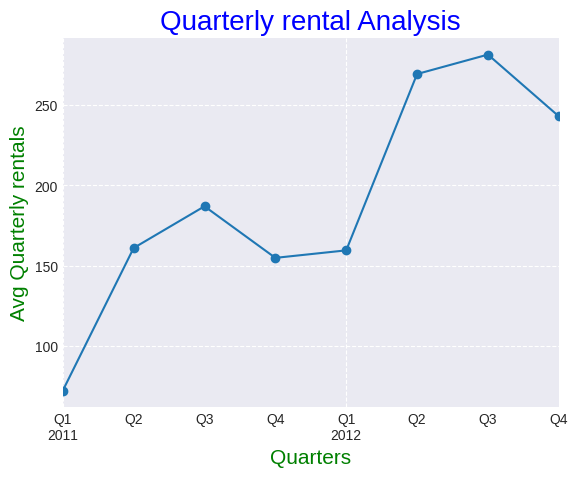

In [ ]:
font1={"color":"green","size":15}
font2={"color":"blue","size":20}
plt.title("Quarterly rental Analysis",fontdict=font2)
x["count"].resample("Q").mean().plot(kind = 'line', marker = 'o')        # This is major step where it takes data for every month
plt.xlabel("Quarters",fontdict = font1)
plt.ylabel("Avg Quarterly rentals",fontdict = font1)
plt.grid(linestyle="--")
plt.show()


3.Hourly Rental Analysis

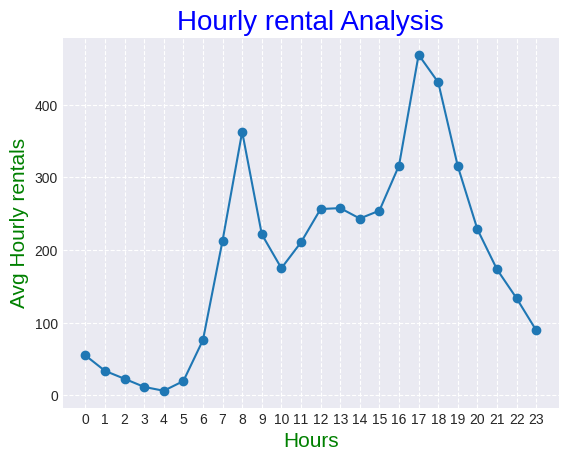

In [ ]:
y=df_1.loc[:,["datetime","count"]]
y["Hour"]=y["datetime"].dt.hour

font1={"color":"green","size":15}
font2={"color":"blue","size":20}
plt.title("Hourly rental Analysis",fontdict=font2)
y.groupby(["Hour"])["count"].mean().plot(kind = 'line', marker = 'o')
plt.xlabel("Hours",fontdict = font1)
plt.ylabel("Avg Hourly rentals",fontdict = font1)
plt.grid(linestyle="--")
plt.xticks(np.arange(0,24))
plt.show()


Insight: Maximum number of rentals is in the morning which is office time and
        around 4-5 in the evening which is again office hour rest of the time there is a dip in rentals

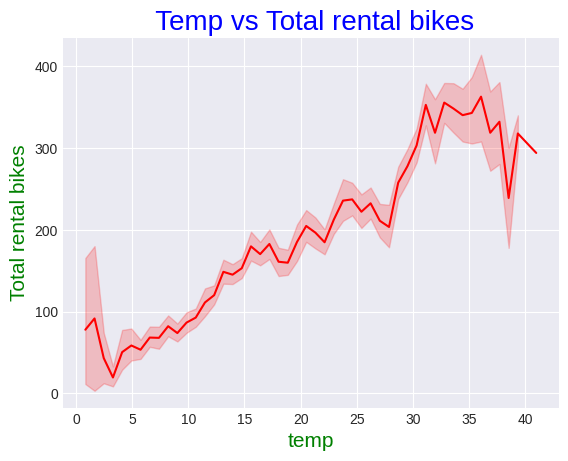

In [ ]:

font1={"color":"green","size":15}
font2={"color":"blue","size":20}
plt.title(" Temp vs Total rental bikes",fontdict=font2)
sns.lineplot(x="temp",y="count",data=df_2,color="r")
plt.xlabel("temp",fontdict=font1)
plt.ylabel("Total rental bikes",fontdict=font1)
plt.show()

Insight: As the temperature rise from 5 to 35 there is increase in rentals and then there is dip after 35

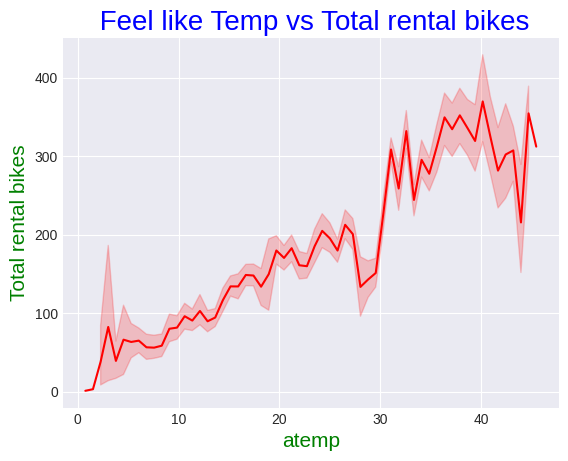

In [ ]:
font1={"color":"green","size":15}
font2={"color":"blue","size":20}
plt.title(" Feel like Temp vs Total rental bikes",fontdict=font2)
sns.lineplot(x="atemp",y="count",data=df_2,color="r")
plt.xlabel("atemp",fontdict=font1)
plt.ylabel("Total rental bikes",fontdict=font1)
plt.show()

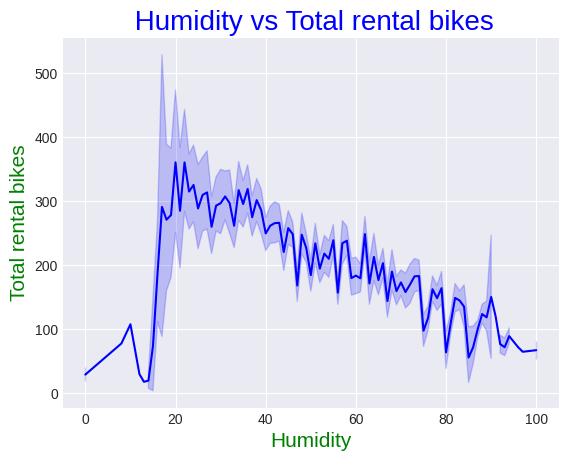

In [ ]:
font1={"color":"green","size":15}
font2={"color":"blue","size":20}
plt.title(" Humidity vs Total rental bikes",fontdict=font2)
sns.lineplot(x="humidity",y="count",data=df_2,color="b")
plt.xlabel("Humidity",fontdict=font1)
plt.ylabel("Total rental bikes",fontdict=font1)
plt.show()


Insight: There is a inverse relationship between the humidity and total rentals

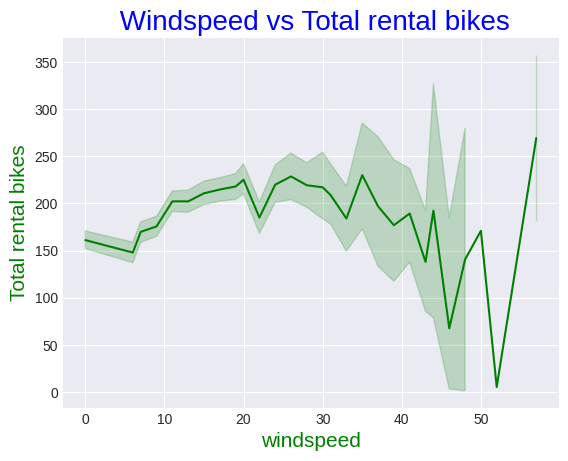

In [ ]:
font1={"color":"green","size":15}
font2={"color":"blue","size":20}
plt.title(" Windspeed vs Total rental bikes",fontdict=font2)
sns.lineplot(x="windspeed",y="count",data=df_2,color="green")
plt.xlabel("windspeed",fontdict=font1)
plt.ylabel("Total rental bikes",fontdict=font1)
plt.show()


Insight: Initialy when windspeed rises rentals go up but after a certain point it starts going down continously

## Heatmap for Numerical columns

<ipython-input-123-f13b954df021>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_3.corr(),annot=True)


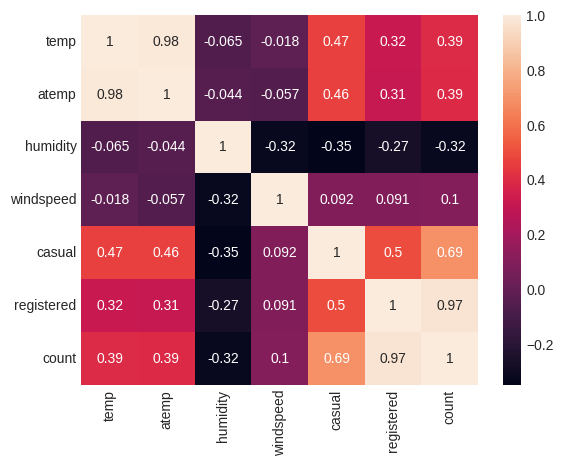

In [ ]:
df_3=df_2.iloc[:,5:]  # extracting the numerical column to show the correlation between them
df_3.head()
sns.heatmap(df_3.corr(),annot=True)
plt.show()

## Testing

## Test_1

T test of independence

In [88]:
df_2
df_2.head()
# We want to establish relationship between work day and bike rented
df_2["workingday"].unique()
 # We observe that there are two categorical value in the work day column vs count(numerical) column
 # we perform ttest_independece for this

array(['Holiday or Weekend', 'Work_Day'], dtype=object)

In [89]:
data_1=df_2[df_2["workingday"]=="Work_Day"]["count"]
data_2=df_2[df_2["workingday"]=="Holiday or Weekend"]["count"]

In [90]:
# Ho: The rental count of bike does not depend on the workingday
# Ha: The rental count of bike depends on the working day

# Assume alpha =0.05
alpha=0.05
from scipy.stats import ttest_ind

stats,p_value=ttest_ind(data_1,data_2)

if p_value< alpha:
  print("Reject the Null Hypothesis, i.e Working day has effect on rental count")
else:
  print("Fail to reject the null hypothesis i.e, Working day has no effect on rental count ")


# Its a two sided ttest_ind

# we can see that p value =0.226 which is >> alpha
# so we can say that rental count is not dependent on working day


Fail to reject the null hypothesis i.e, Working day has no effect on rental count 


## Test_2

Chi2_contigency

In [91]:
# Ho: Weather has no effect on sesons
# Ha: Weather has effect on seasons

from scipy.stats import chi2_contingency
df_2["weather"].unique()
df_2["season"].unique()

array(['spring', 'summer', 'fall', 'winter'], dtype=object)

In [92]:
data=pd.crosstab(df_2["season"],df_2["weather"])
data

weather,Clear,Heavy Rain & Thunderstorm,Light Snow+ Rain,Mist + Cloudy
season,,,,
fall,1930,0,199,604
spring,1759,1,211,715
summer,1801,0,224,708
winter,1702,0,225,807


In [93]:
stats,p_value,dof,exp=chi2_contingency(data)
stats,p_value,dof,exp

(49.158655596893624,
 1.549925073686492e-07,
 9,
 array([[1.80559765e+03, 2.51056403e-01, 2.15657450e+02, 7.11493845e+02],
        [1.77454639e+03, 2.46738931e-01, 2.11948742e+02, 6.99258130e+02],
        [1.80559765e+03, 2.51056403e-01, 2.15657450e+02, 7.11493845e+02],
        [1.80625831e+03, 2.51148264e-01, 2.15736359e+02, 7.11754180e+02]]))

In [86]:
alpha=0.05
if p_value< alpha:
  print("Reject the Null Hypothesis, i.e. Weather has  effect on sesons")
else:
  print("Fail to reject the null hypothesis i.e, Weather has no effect on seasons ")

Reject the Null Hypothesis, i.e. Weather has  effect on sesons


## Test_3

Two way ANOVA ( Weather and Total rental bikes)

In [ ]:
# Null and alternate hypothesis
# Ho:Weather has no effect on bike rental
# Ha: Weather has a effect on the  bike rentals

In [94]:
df_2["weather"].value_counts()
df_new=df_2[~(df_2["weather"]=="Heavy Rain & Thunderstorm")]
df_new["weather"].value_counts()

Clear                7192
Mist + Cloudy        2834
Light Snow+ Rain      859
Name: weather, dtype: int64

In [95]:
data_1=df_new[df_new["weather"]=="Clear"]["count"]
data_2=df_new[df_new["weather"]=="Mist + Cloudy"]["count"]
data_3=df_new[df_new["weather"]=="Light Snow+ Rain "]["count"]

# While performing the ANOVA test we check whether the asumptios of ANOVA are being followed or not i.e
# We will check the Normality test and test of Variance

Normality Test

Shapiro test

In [96]:
# Normality check from shapiro test
from scipy.stats import shapiro
sstat,pvalue=shapiro(df_new["count"].sample(4500))
print(pvalue)

if pvalue<0.05:
  print("its gaussian(normal distribution)")
else:
  print("Its not gaussian(not normally distributed)")

0.0
its gaussian(normal distribution)


KS Test

In [97]:
# Normality test from kstest
from scipy.stats import kstest
kstat,p_value=kstest(data_1,data_2,data_3)

print(p_value)

if p_value<0.05:
  print("its gaussian(normal distribution)")
else:
  print("Its not gaussian(not normally distributed)")

2.0232588507344455e-07
its gaussian(normal distribution)


QQ plot

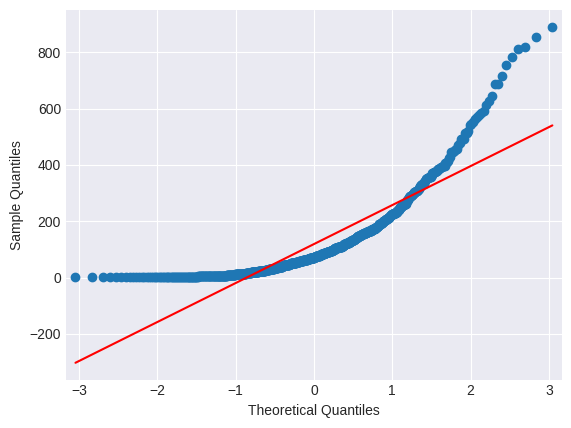

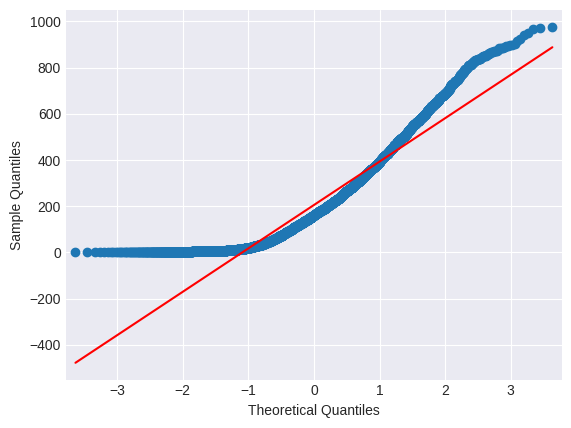

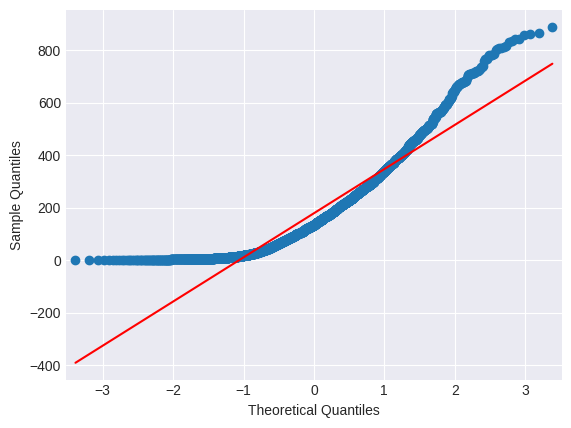

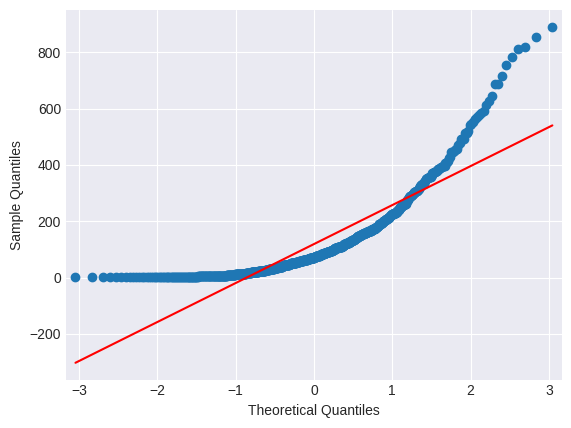

In [76]:
#normality test qq plot,
# this output shows its not gaussian, since the percentile of sample is not
# intact with line of gaussian distribution
from statsmodels.graphics.gofplots import qqplot
qqplot(data_1,line="s")
qqplot(data_2,line="s")
qqplot(data_3,line="s")

Test of variance

In [61]:

# Ho: Variance is equal
# Ha: Variance is not equal
from scipy.stats import levene
alpha=0.05
stat,p_value=levene(data_1,data_2,data_3)
stat,p_value
if p_value<alpha:
  print("Reject Null Hypothesis , i.e. Variance not equal")
else:
  print("Fail to reject  Null Hypothesis, i.e. Equal variance")


Reject Null Hypothesis , i.e. Variance not equal


final Anova test

In [62]:
from scipy.stats import f_oneway
stats,p_val=f_oneway(data_1,data_2,data_3)
stats,p_val
alpha=0.05
if p_val<alpha:
  print("Rejct Null Hypothesis, Weather has a effect on the  bike rentals ")
else:
  print(" Fail to reject Ho i.e, Weather has no effect on bike rentals")

Rejct Null Hypothesis, Weather has a effect on the  bike rentals 


## Test 4

Two way ANOVA ( Season and Total rental bikes)

In [ ]:
# Null and alternate hypothesis
# Ho:Season has no effect on bike rental
# Ha: Season has a effect on the  bike rentals

In [63]:
df_2["season"].unique()

array(['spring', 'summer', 'fall', 'winter'], dtype=object)

In [ ]:
data_s1=df_2[df_2["season"]=="spring"]["count"]
data_s2=df_2[df_2["season"]=="summer"]["count"]
data_s3=df_2[df_2["season"]=="fall"]["count"]
data_s4=df_2[df_2["season"]=="winter"]["count"]

Normality Test

Shapiro Test

In [77]:
# Normality check from shapiro test
from scipy.stats import shapiro
sstat,pvalue=shapiro(df_2["count"].sample(4500))
print(pvalue)

if pvalue<0.05:
  print("its gaussian(normal distribution)")
else:
  print("Its not gaussian(not normally distributed)")

0.0
its gaussian(normal distribution)


KS test

In [80]:
# normality test kstest
from scipy.stats import kstest
kstat,pvalue=kstest(data_s1,data_s2,data_s3,data_s4)

print(pvalue)

if pvalue<0.05:
  print("its gaussian(normal distribution)")
else:
  print("Its not gaussian(not normally distributed)")

5.229818428809134e-90
its gaussian(normal distribution)


QQ plot

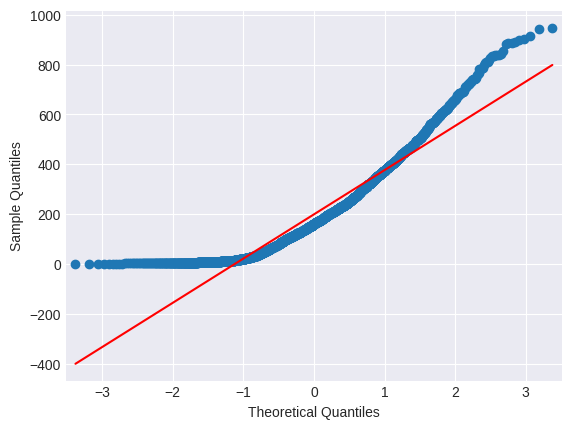

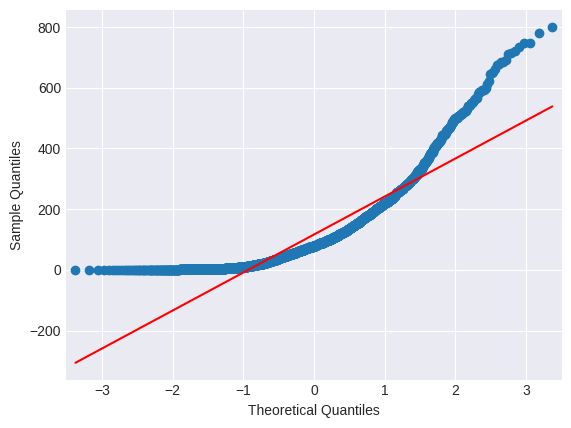

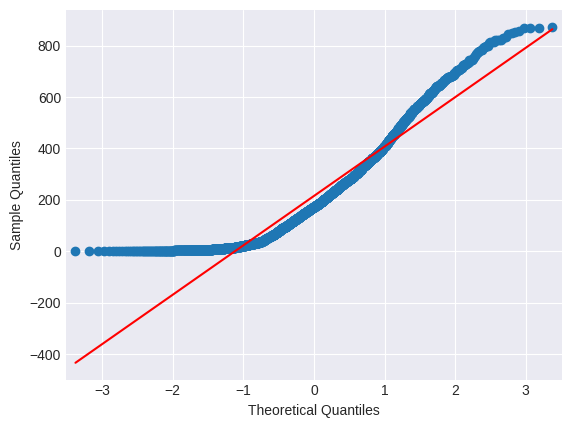

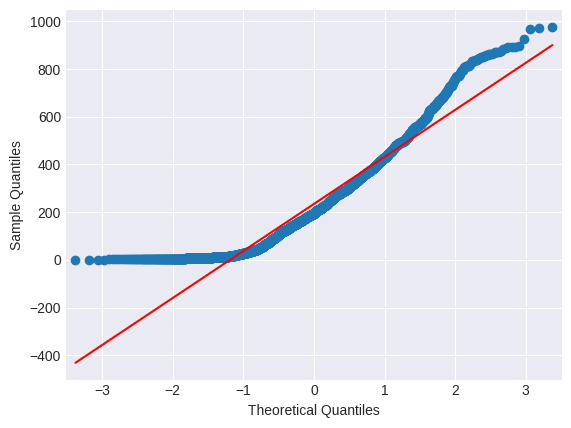

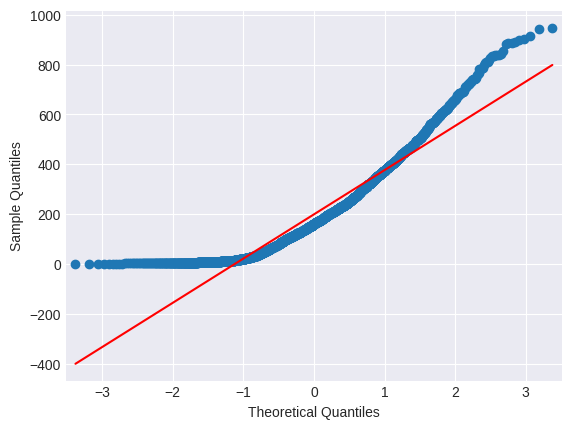

In [79]:
#normality test qq plot,
# this output shows its not gaussian, since the percentile of sample is not
# intact with line of gaussian distribution
from statsmodels.graphics.gofplots import qqplot
qqplot(data_s1,line="s")
qqplot(data_s2,line="s")
qqplot(data_s3,line="s")
qqplot(data_s4,line="s")

Test of Variance

In [68]:
# Ho: Variance is equal
# Ha: Variance is not equal
from scipy.stats import levene
alpha=0.05
stat,p_value=levene(data_s1,data_s2,data_s3,data_s4)
stat,p_value
if p_value<alpha:
  print("Reject Null Hypothesis , i.e. Variance not equal")
else:
  print("Fail to reject  Null Hypothesis, i.e. Equal variance")

Reject Null Hypothesis , i.e. Variance not equal


Final ANOVA TEST

In [69]:
from scipy.stats import f_oneway
stats,p_val=f_oneway(data_s1,data_s2,data_s3,data_s4)
stats,p_val
alpha=0.05
if p_val<alpha:
  print("Rejct Null Hypothesis, Weather has a effect on the  bike rentals ")
else:
  print(" Fail to reject Ho i.e, Weather has no effect on bike rentals")

Rejct Null Hypothesis, Weather has a effect on the  bike rentals 


## Recomendations

1. Since we can observe that the Average bike rentals are low  month of January and feb
   so giving special discounts In those months will enhance the buisness
2. Since we can observe that the total sum of rentals for registered is almost
   4 times the casual ones  so we can give some one time offer to register
3. Running coupons in the daytime and late night will have higher probability of
   more rentals as there is peak in rentals in the early morning and in the evening around 4 PM

4.  As the temperature falls below certain point we can see there are hardly
       any rentals in those temperature range so providing rented windcheaters
       and rental thermal jacket may be a better idea to enhance the rentals

5. Similar rented special clothing for high humid timing will be a good step  
  for better buisness of the company

